<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

How do we, humans, recognize a forest as a forest or a mountain as a mountain? We are very good at categorizing scenes based on the semantic representation and object affinity, but we know very little about the processing and encoding of natural scene categories in the human brain. In this problem, you are provided with a dataset of ~25k images from a wide range of natural scenes from all around the world. Your task is to identify which kind of scene can the image be categorized into.

Note - This dataset can be found on kaggle

# Dateset Details
Created by Intel for an image classification contest, this expansive image dataset contains approximately 25,000 images. Furthermore, the images are divided into the following categories: buildings, forest, glacier, mountain, sea, and street. The dataset has been divided into folders for training, testing, and prediction. The training folder includes around 14,000 images and the testing folder has around 3,000 images. Finally, the prediction folder includes around 7,000 images. 

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
project_name='Intel-Image_classification'

In [ ]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hargurjeet","key":"c3882bdbb49388021171402c7018655e"}'}

In [ ]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/puneet6060/intel-image-classification/version/2'
od.download('https://www.kaggle.com/puneet6060/intel-image-classification/version/2')

  1%|▏         | 5.00M/346M [00:00<00:10, 33.5MB/s]

100%|██████████| 346M/346M [00:02<00:00, 147MB/s]


In [ ]:
# Accesssing the classes
data_dir = '/content/intel-image-classification'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/seg_train/seg_train")
print(classes)

['seg_train', 'seg_test', 'seg_pred']
['glacier', 'buildings', 'forest', 'street', 'mountain', 'sea']


In [ ]:
# validating the data in floders

street_files = os.listdir(data_dir + "/seg_train/seg_train/street")
print('No. of training examples for street:', len(street_files))
print(street_files[:5])

No. of training examples for street: 2382
['7178.jpg', '9014.jpg', '9843.jpg', '5512.jpg', '6825.jpg']


In [ ]:
buildings_files = os.listdir(data_dir + "/seg_train/seg_train/buildings")
print('No. of training examples for buildings:', len(buildings_files))
print(buildings_files[:5])

No. of training examples for buildings: 2191
['7379.jpg', '5735.jpg', '751.jpg', '10528.jpg', '12406.jpg']


# Dataset Pre Processing

## Transforming the datset to Tensors

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
import torchvision.transforms as tt
img_size = 150

train_tfms = tt.Compose([

                         tt.Resize((img_size, img_size)),
                         tt.ToTensor()
                        
                         ])
valid_tfms = tt.Compose([tt.Resize((img_size, img_size)), tt.ToTensor() 
                        
                         ])

In [ ]:
dataset = ImageFolder(data_dir+'/seg_train/seg_train', train_tfms)

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 1500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(12534, 1500)

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 150, 150]) 0


tensor([[[0.9686, 0.9686, 0.9725,  ..., 0.9725, 0.9686, 0.9686],
         [0.9647, 0.9686, 0.9686,  ..., 0.9725, 0.9686, 0.9686],
         [0.9647, 0.9647, 0.9686,  ..., 0.9725, 0.9686, 0.9686],
         ...,
         [0.1843, 0.2431, 0.1922,  ..., 0.2000, 0.1765, 0.3686],
         [0.3020, 0.1843, 0.1686,  ..., 0.0863, 0.2157, 0.1529],
         [0.2314, 0.2157, 0.2353,  ..., 0.1216, 0.2000, 0.2471]],

        [[0.9686, 0.9686, 0.9725,  ..., 0.9725, 0.9686, 0.9686],
         [0.9647, 0.9686, 0.9686,  ..., 0.9725, 0.9686, 0.9686],
         [0.9647, 0.9647, 0.9686,  ..., 0.9725, 0.9686, 0.9686],
         ...,
         [0.1804, 0.2392, 0.1882,  ..., 0.1804, 0.1569, 0.3490],
         [0.2980, 0.1804, 0.1647,  ..., 0.0667, 0.1961, 0.1333],
         [0.2275, 0.2118, 0.2314,  ..., 0.1020, 0.1804, 0.2275]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9725, 0.9608, 0.9608],
         [0.9569, 0.9608, 0.9608,  ..., 0.9725, 0.9608, 0.9608],
         [0.9569, 0.9569, 0.9608,  ..., 0.9725, 0.9608, 0.

In [ ]:
print(dataset.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Sample dataset

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  buildings (0)


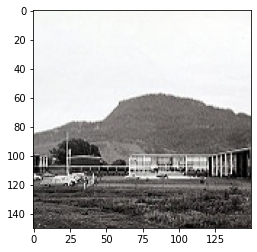

In [ ]:
show_example(*dataset[0])

Label:  buildings (0)


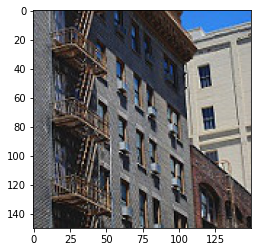

In [ ]:
show_example(*dataset[1099])

In [ ]:
# !pip install jovian --upgrade -q
# import jovian

In [ ]:
# jovian.commit(project=project_name)

## Loading the datset to a dataloader

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

## Sample Batch

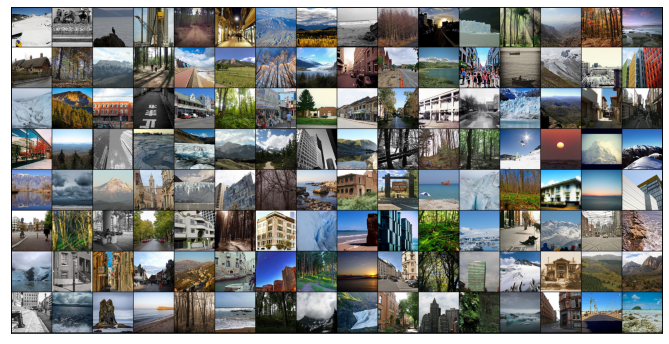

In [ ]:
show_batch(train_dl)

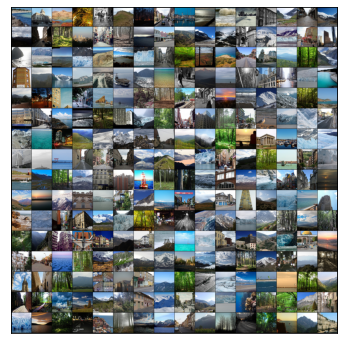

In [ ]:
show_batch(val_dl)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Defining the Model

In [ ]:
class IntelModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 75 x 75

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 37 x 37

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 18 x 18

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 512 x 9 x 9

            nn.Flatten(), 
            nn.Linear(512*9*9, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 6))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = IntelModel()
model

IntelModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 150, 150])
out.shape: torch.Size([128, 6])
out[0]: tensor([-0.0411, -0.0129,  0.0464,  0.0025,  0.0223, -0.0206],
       grad_fn=<SelectBackward>)


# Validate the GPU avaliablity

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

# Training the model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(IntelModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_acc': 0.1677793711423874, 'val_loss': 1.7907509803771973}

In [ ]:
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/hargurjeet/intel-image-classification


'https://jovian.ai/hargurjeet/intel-image-classification'

In [ ]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.4391, val_loss: 1.0141, val_acc: 0.5806
Epoch [1], train_loss: 0.9281, val_loss: 0.8499, val_acc: 0.6473
Epoch [2], train_loss: 0.7928, val_loss: 0.7517, val_acc: 0.7031
Epoch [3], train_loss: 0.6657, val_loss: 0.6188, val_acc: 0.7638
Epoch [4], train_loss: 0.5773, val_loss: 0.6105, val_acc: 0.7659
Epoch [5], train_loss: 0.5020, val_loss: 0.6137, val_acc: 0.7648
Epoch [6], train_loss: 0.4409, val_loss: 0.5535, val_acc: 0.7989
Epoch [7], train_loss: 0.3744, val_loss: 0.5385, val_acc: 0.8112
Epoch [8], train_loss: 0.3142, val_loss: 0.5635, val_acc: 0.8125
Epoch [9], train_loss: 0.2929, val_loss: 0.6535, val_acc: 0.7920
Epoch [10], train_loss: 0.2270, val_loss: 0.7149, val_acc: 0.7980
Epoch [11], train_loss: 0.1965, val_loss: 0.6931, val_acc: 0.8166
Epoch [12], train_loss: 0.1413, val_loss: 0.8041, val_acc: 0.8143
Epoch [13], train_loss: 0.1174, val_loss: 0.8439, val_acc: 0.8045
Epoch [14], train_loss: 0.1081, val_loss: 0.9163, val_acc: 0.8063


In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

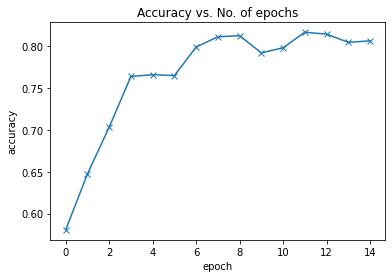

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 82%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 90% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

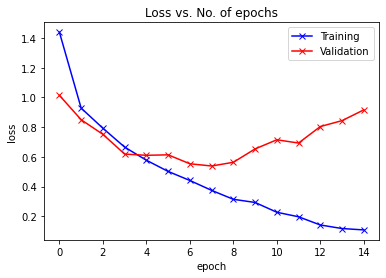

In [ ]:
plot_losses(history)

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point!

This phenomenon is called overfitting, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.

Following are some common stragegies for avoiding overfitting:

Gathering and generating more training data, or adding noise to it
Using regularization techniques like batch normalization & dropout
Early stopping of model's training, when validation loss starts to increase

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/hargurjeet/intel-image-classification


'https://jovian.ai/hargurjeet/intel-image-classification'

# **Running the model on Test Set**

In [ ]:
test_tfms = tt.Compose([tt.Resize((img_size, img_size)), 
                        tt.ToTensor()])

In [ ]:
test_dataset = ImageFolder(data_dir+'/seg_test/seg_test', test_tfms)

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8109188675880432, 'val_loss': 0.8851442337036133}

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: buildings , Predicted: buildings


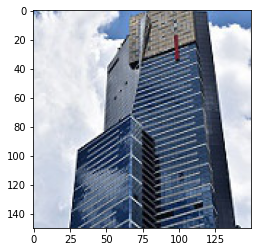

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: buildings , Predicted: buildings


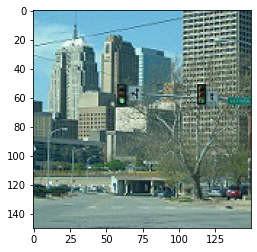

In [ ]:
img, label = test_dataset[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: buildings , Predicted: street


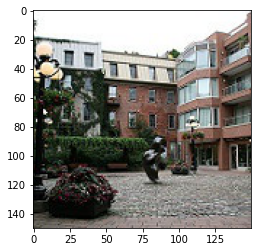

In [ ]:
img, label = test_dataset[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

# Saving the model

In [ ]:
torch.save(model.state_dict(), 'Intel-cnn.pth')

In [ ]:
model2 = to_device(IntelModel(), device)

In [ ]:
model2.load_state_dict(torch.load('Intel-cnn.pth'))

<All keys matched successfully>

In [ ]:
evaluate(model2, test_loader)

In [ ]:
jovian.commit(project=project_name)

# Summary and Further Exercise

1. Introduction to the Intel dataset for image classification

1.   Downloading, extracing and loading an image dataset using torchvision
2.   Show random batches of images in a grid using torchvision.utils.make_grid


4.   Capturing dataset information, metrics and hyperparameters using the jovian library
5.   Training a convolutional neural network and visualizing the losses and errors


6.   Understanding overfitting and the strategies for avoiding it (more on this later)
7.   Generating predictions on single images from the test set


There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

1. Try chaging the hyperparameters to achieve a higher accuracy within fewer epochs. You use the comparison table on the Jovian.ml project page to compare your experiments.

2. Try adding more convolutional layers, or increasing the number of channels in each convolutional layer

3. Read about some of the startegies mentioned above for reducing overfitting and achieving better results, and try to implement them by looking into the PyTorch docs.



